# AO index v.s. other variables

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
#import cartopy.feature
#import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [199]:
coordinate_name=glob.glob('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

# Variables

## AO index

In [44]:
MAT = scipy.io.loadmat('../../_data/Exchange/AO_inds.mat')
AO = MAT['AO_index'][0, :]

## SLP

In [4]:
year = np.arange(2002, 2014)
#u10 = np.empty([144, 368, 801])
#v10 = np.empty([144, 368, 801])
slp = np.empty([144, 368, 801])
for i in range(12):
#    name_u = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*u*'+str(year[i])+'*monmean*')
#    name_v = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*v*'+str(year[i])+'*monmean*')
    name_slp = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*slp*'+str(year[i])+'*monmean*')
#    u_obj = nc.Dataset(name_u[0])
#    v_obj = nc.Dataset(name_v[0])
    slp_obj = nc.Dataset(name_slp[0])
#    u10[i*12:(i+1)*12, :, :] = u_obj.variables['u_wind'][:, :, :]
#    v10[i*12:(i+1)*12, :, :] = v_obj.variables['v_wind'][:, :, :]
    slp[i*12:(i+1)*12, :, :] = slp_obj.variables['atmpres'][:, :, :]

In [6]:
x = slp_obj.variables['LON'][:]
y = slp_obj.variables['LAT'][:]
[lon, lat] = np.meshgrid(x, y)

## Zonal/Meridional Currents

In [7]:
UName = sorted(glob.glob('../../_data/MAT files/vozocrtx_by_month/vozocrtx*mat'))
VName = sorted(glob.glob('../../_data/MAT files/vomecrty_by_month/vomecrty*mat'))

In [9]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_boundary_ANHA4.mat')
domain = MAT['domain'][:].T

In [330]:
#vozocrtx0 = np.zeros([144, 800, 544])
#vomecrty0 = np.zeros([144, 800, 544])
#vozocrtx1 = np.zeros([144, 800, 544])
#vomecrty1 = np.zeros([144, 800, 544])
#
#for i in range(144):
#    #
#    print(i)
#    UMAT = scipy.io.loadmat(UName[i])
#    vz = UMAT['vozocrtx'][:]
#    vz[vz>1e7] = np.nan
#    vz0 = np.nanmean(vz[:20, :, :], 0)
#    vozocrtx0[i, :, :] = vz0
#    vz1 = np.nanmean(vz[20:27, :, :], 0)
#    vozocrtx1[i, :, :] = vz1
#    print('zonal')
#    #
#    VMAT = scipy.io.loadmat(VName[i])
#    vm = VMAT['vomecrty'][:]
#    vm[vm>1e7] = np.nan
#    vm0 = np.nanmean(vm[:20, :, :], 0)
#    vomecrty0[i, :, :] = vm0
#    vm1 = np.nanmean(vm[20:27, :, :], 0)
#    vomecrty1[i, :, :] = vm1
#    print('meridional')

In [64]:
save_var = {'vozocrtx0':vozocrtx0, 'vomecrty0':vomecrty0,
            'vozocrtx1':vozocrtx1, 'vomecrty1':vomecrty1}
scipy.io.savemat('../../_data/Exchange/UV_current.mat', mdict=save_var)

In [65]:
MAT = scipy.io.loadmat('../../_data/Exchange/UV_current.mat')
vozocrtx0 = MAT['vozocrtx0'][:]
vozocrtx1 = MAT['vozocrtx1'][:]
vomecrty0 = MAT['vomecrty0'][:]
vomecrty1 = MAT['vomecrty1'][:]

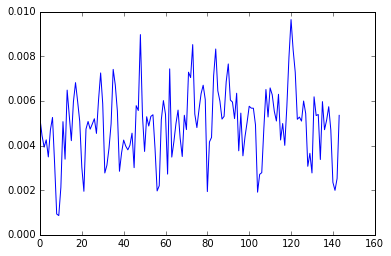

In [92]:
plt.plot(np.nanmean(np.nanmean(vomecrty0, 1), 1))

In [120]:
obj_z = nc.Dataset('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/vozocrtx_monmean.nc')
obj_m = nc.Dataset('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/vomecrty_monmean.nc')
zc = obj_z.variables['vozocrtx'][:]
mc = obj_m.variables['vomecrty'][:]
zc[zc>100] = np.nan
mc[mc>100] = np.nan

In [200]:
#nav_lon[nav_lon<0]=nav_lon[nav_lon<0]+360

In [289]:
u0p = np.nanmean(vozocrtx0[AO>0, :, :], 0)
v0p = np.nanmean(vomecrty0[AO>0, :, :], 0)
slpp = np.nanmean(slp[AO>0, :, :], 0)/100
# 
u0n = np.nanmean(vozocrtx0[AO<0, :, :], 0)
v0n = np.nanmean(vomecrty0[AO<0, :, :], 0)
slpn = np.nanmean(slp[AO<0, :, :], 0)/100
#



In [318]:
NAMEU = sorted(glob.glob('/ocean/yingkai/GEOTRACES/*gridU*'))
NAMEV = sorted(glob.glob('/ocean/yingkai/GEOTRACES/*gridV*'))

In [297]:

u = nc.Dataset(NAMEU[3]).variables['vozocrtx']
v = nc.Dataset(NAMEV[3]).variables['vomecrty']
u0p = u[0, 0, :, :]
v0p = v[0, 0, :, :]

#sp = np.sqrt(u0p**2+v0p**2)
#u0p = u0p/sp; v0p = v0p/sp

In [ ]:
lev = 

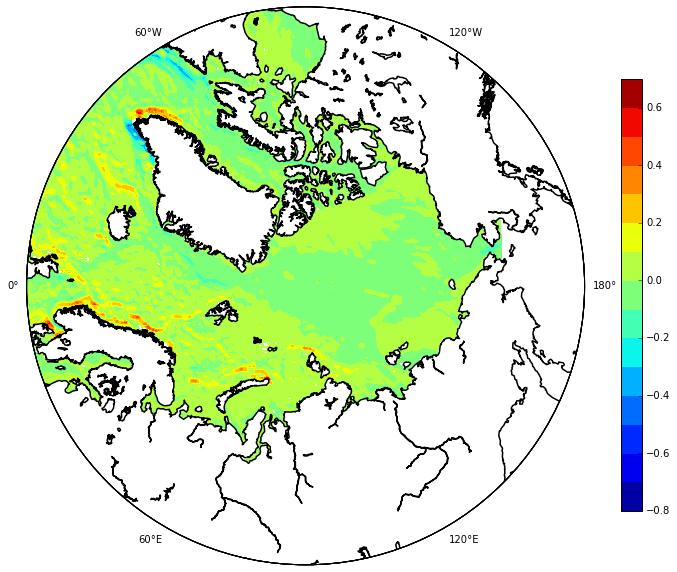

In [294]:
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)

#proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS = proj.contourf(x, y, v0p, 15)
cax = fig.add_axes([0.95, 0.2, 0.03, 0.6])
CBar = fig.colorbar(CS, cax=cax, orientation='vertical')
CBar.ax.tick_params(axis='x', length=16)

In [320]:
zcmean = np.zeros([800, 544])
mcmean = np.zeros([800, 544])
for i in range(5):
    u = nc.Dataset(NAMEU[i]).variables['vozocrtx']
    v = nc.Dataset(NAMEV[i]).variables['vomecrty']
    zcmean += u[0, 0, :, :]
    mcmean += v[0, 0, :, :]
    
zcmean = zcmean/5
mcmean = mcmean/5

#LOOK

## Original

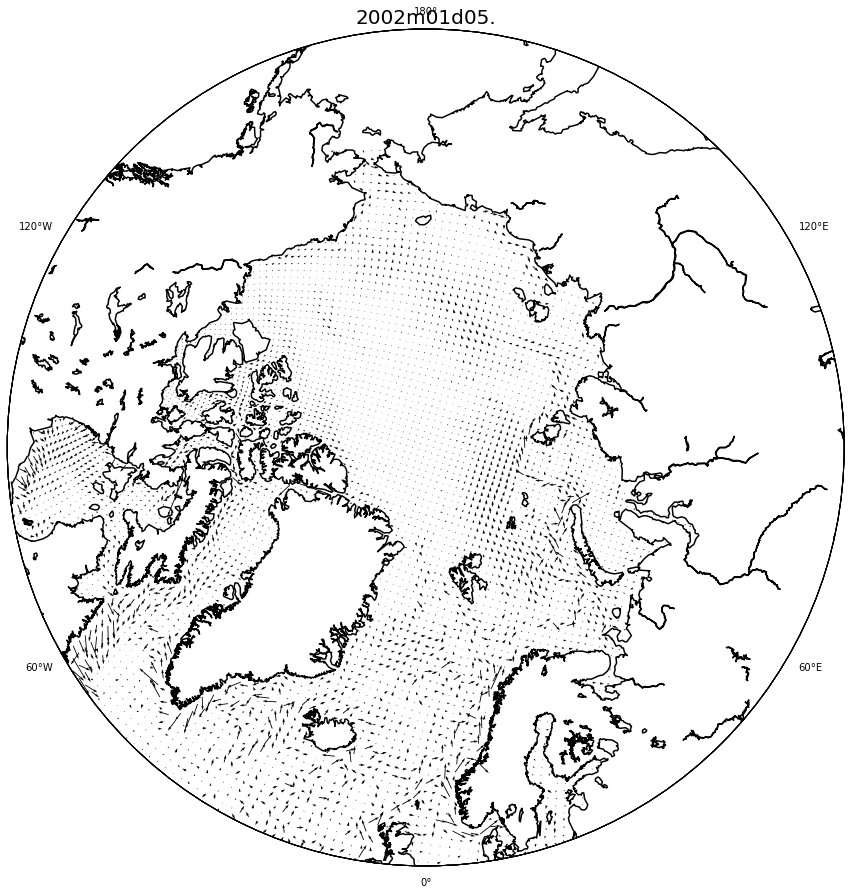

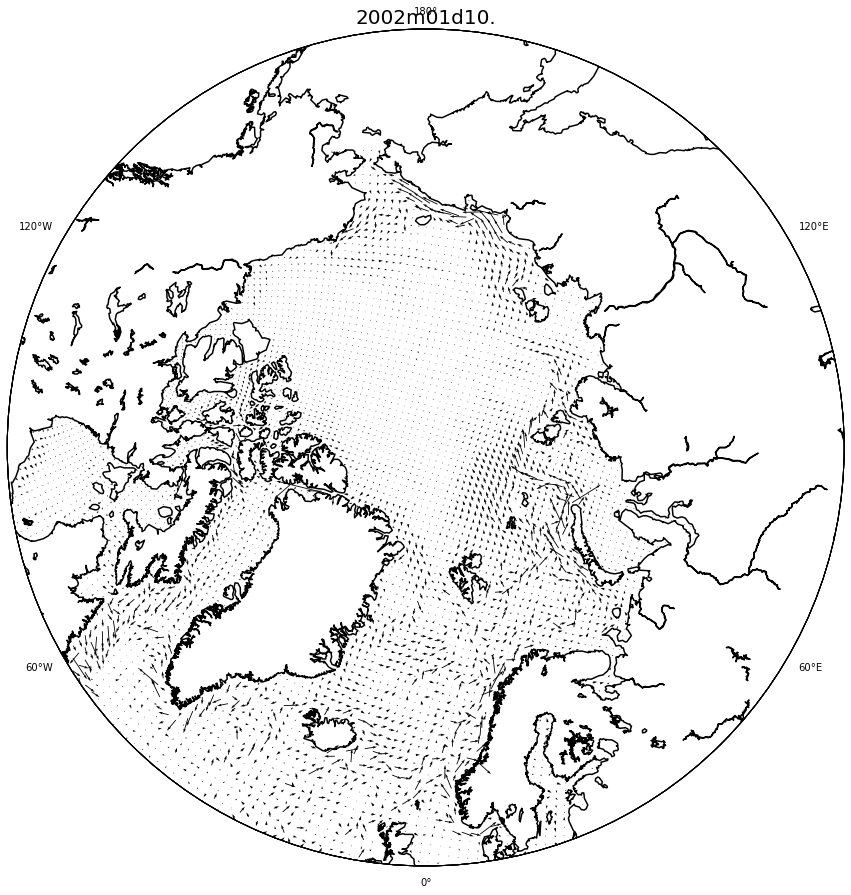

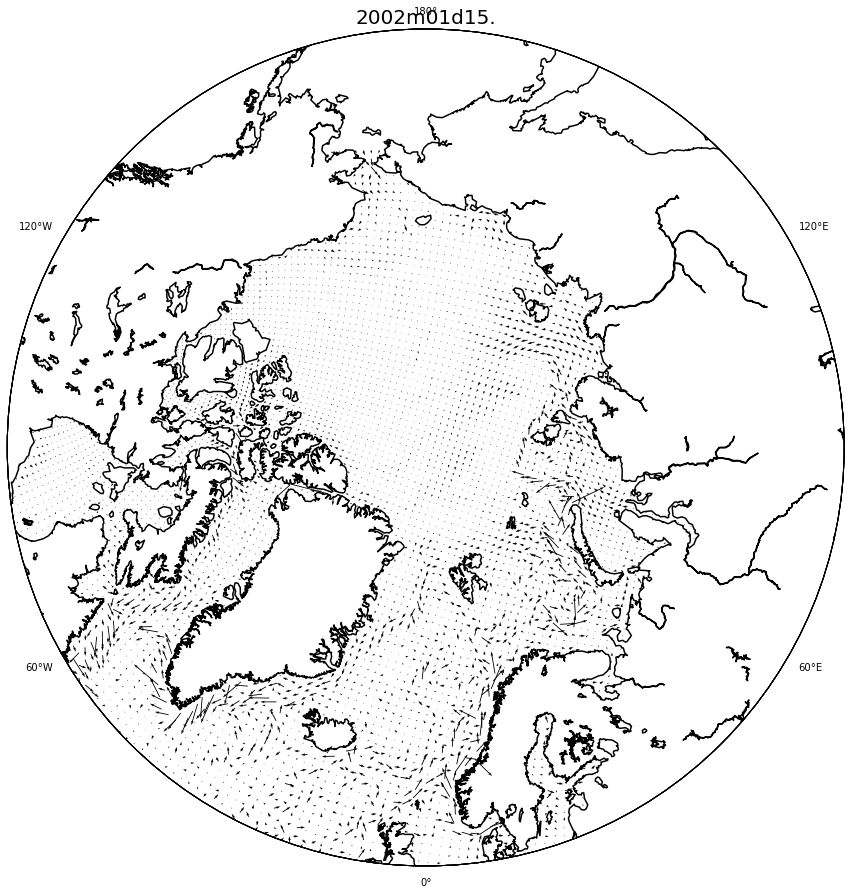

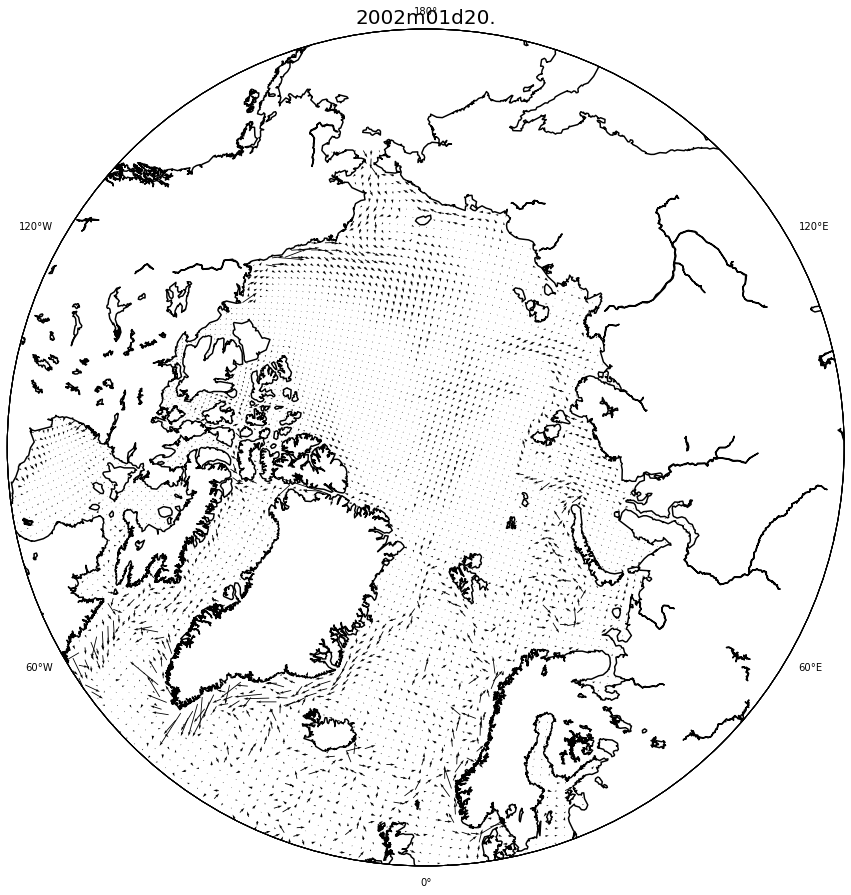

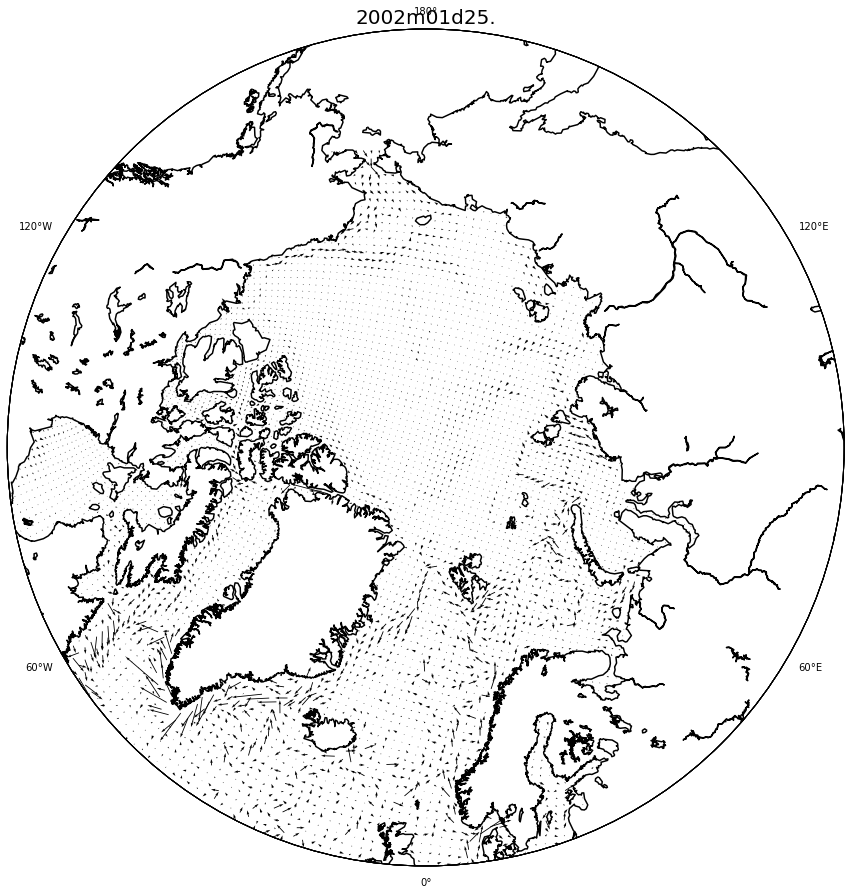

In [438]:
N = 5
u0p = vozocrtx0[15, :, :]
v0p = vomecrty0[15, :, :]
lev_slp = np.arange(990, 1022.5, 2.5)

for i in range(5):


    fig=plt.figure(figsize=(15, 15));
    ax1 = fig.gca()

    u = nc.Dataset(NAMEU[i]).variables['vozocrtx']
    v = nc.Dataset(NAMEV[i]).variables['vomecrty']
    zc = u[0, 0, :, :]
    mc = v[0, 0, :, :]
    
    #proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
    proj = Basemap(resolution='l',projection='nplaea',boundinglat=55, lon_0=0, round=True)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)

    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    #uproj1, vproj1, xx, yy = proj.rotate_vector(zc, mc, nav_lon, nav_lat, returnxy=True)
    #proj.quiver(xx[::N, ::N], yy[::N, ::N], uproj1[::N, ::N], vproj1[::N, ::N], width=0.002, scale=4)
    proj.quiver(x[::N, ::N], y[::N, ::N], zc[::N, ::N], mc[::N, ::N],  width=0.001, scale=18)
    ax1.set_title(NAMEU[i][45:56], fontsize=20)


## The mean of 5 original

In [322]:
zcmean = np.zeros([800, 544])
mcmean = np.zeros([800, 544])
for i in range(5):
    u = nc.Dataset(NAMEU[i]).variables['vozocrtx']
    v = nc.Dataset(NAMEV[i]).variables['vomecrty']
    zcmean += u[0, 0, :, :]
    mcmean += v[0, 0, :, :]
    
zcmean = zcmean/5
mcmean = mcmean/5

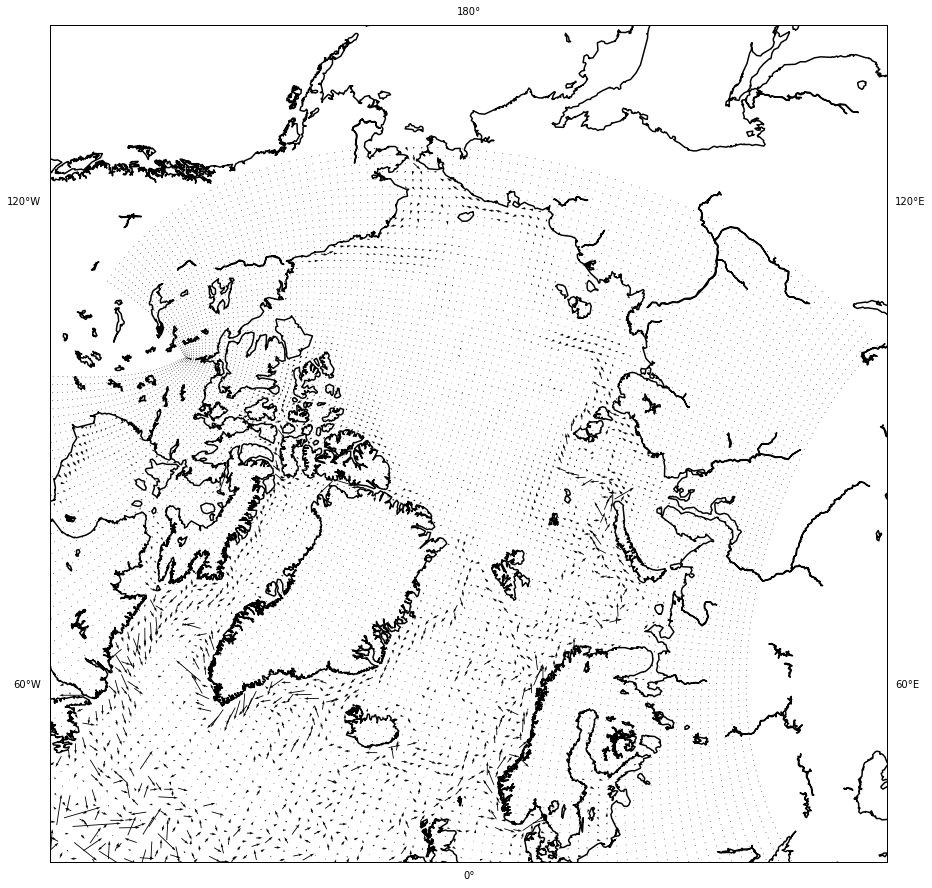

In [436]:
fig=plt.figure(figsize=(15, 15));
ax1 = fig.gca()
proj=Basemap(resolution='l',projection='nplaea',boundinglat=55,lon_0=0, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)

#proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
#uproj1, vproj1, xx, yy = proj.rotate_vector(zcmean, mcmean, nav_lon, nav_lat, returnxy=True)
proj.quiver(x[::N, ::N], y[::N, ::N], zcmean[::N, ::N], mcmean[::N, ::N], width=0.001, scale=18)

In [326]:
obj_z = nc.Dataset('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/vozocrtx_monmean.nc')
obj_m = nc.Dataset('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/vomecrty_monmean.nc')
zc = obj_z.variables['vozocrtx'][:]
mc = obj_m.variables['vomecrty'][:]
zc[zc>100] = np.nan
mc[mc>100] = np.nan

In [328]:
zc.shape

(144, 800, 544)

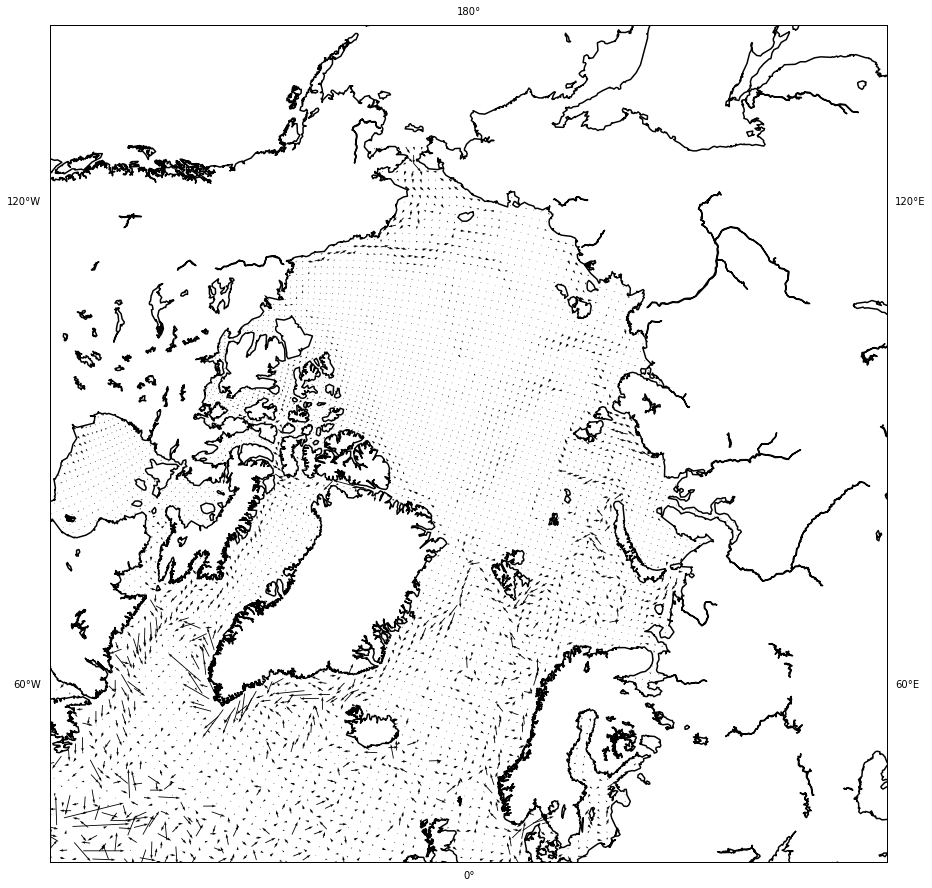

In [437]:
fig=plt.figure(figsize=(15, 15));
ax1 = fig.gca()
proj=Basemap(resolution='l',projection='nplaea',boundinglat=55,lon_0=0, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)

#proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
#uproj1, vproj1, xx, yy = proj.rotate_vector(zc[0, :, :], mc[0, :, :], nav_lon, nav_lat, returnxy=True)
proj.quiver(x[::N, ::N], y[::N, ::N], zc[::N, ::N], mc[::N, ::N], width=0.001, scale=18)

## Tracer transport

In [396]:
#save_var = {'Ba_fluxFS_n':Ba_fluxFS_n,            'Ba_fluxFS_s':Ba_fluxFS_s,
#            'Ba_fluxBB_n':Ba_fluxBB_n[:, :, 30:], 'Ba_fluxBB_s':Ba_fluxBB_s[:, :, 30:],
#            'xzFS': xzFS, 'xzBB': xzBB[:, 30:]}
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_flux_param.mat')
Ba_fluxFS_s = MAT['Ba_fluxFS_s']
Ba_fluxFS_n = MAT['Ba_fluxFS_n']
Ba_fluxFS = Ba_fluxFS_s+Ba_fluxFS_n

Ba_fluxBB_s = MAT['Ba_fluxBB_s']
Ba_fluxBB_n = MAT['Ba_fluxBB_n']
Ba_fluxBB = Ba_fluxBB_s+Ba_fluxBB_n


xzFS = MAT['xzFS']
xzBB = MAT['xzBB']

fake_xgridFS = MAT['fake_xgridFS']; dgridFS = MAT['dgridFS']
fake_xgridBB = MAT['fake_xgridBB']; dgridBB = MAT['dgridBB']

In [413]:
pearsonr(np.abs(np.nansum(np.nansum(Ba_fluxFS_s[:, :20, :], 1), 1)), AO)

(0.020875278022111234, 0.80386581490347542)

In [414]:
pearsonr(np.abs(np.nansum(np.nansum(Ba_fluxFS_n[:, :20, :], 1), 1)), AO)

(0.23590171957852191, 0.0044211644750663283)

In [406]:
pearsonr(np.abs(np.nansum(np.nansum(Ba_fluxBB_n, 1), 1)), AO)

(-0.36064331101839947, 8.9805621087835243e-06)

In [389]:
from scipy.stats.stats import pearsonr

In [393]:
corrFS = np.zeros([50, 181])
pFS = np.zeros([50, 181])

corrBB = np.zeros([50, 95])
pBB = np.zeros([50, 95])


for i in range(50):
    for j in range(181):
        corrFS[i, j], pFS[i, j] = pearsonr(Ba_fluxFS[:, i, j]*xzFS[i, j], AO)
    for j2 in range(95):
        corrBB[i, j2], pBB[i, j2] = pearsonr(Ba_fluxBB[:, i, j2]*xzBB[i, j2], AO)

In [394]:
lev_corr = np.arange(-0.4, 0.5, 0.1)

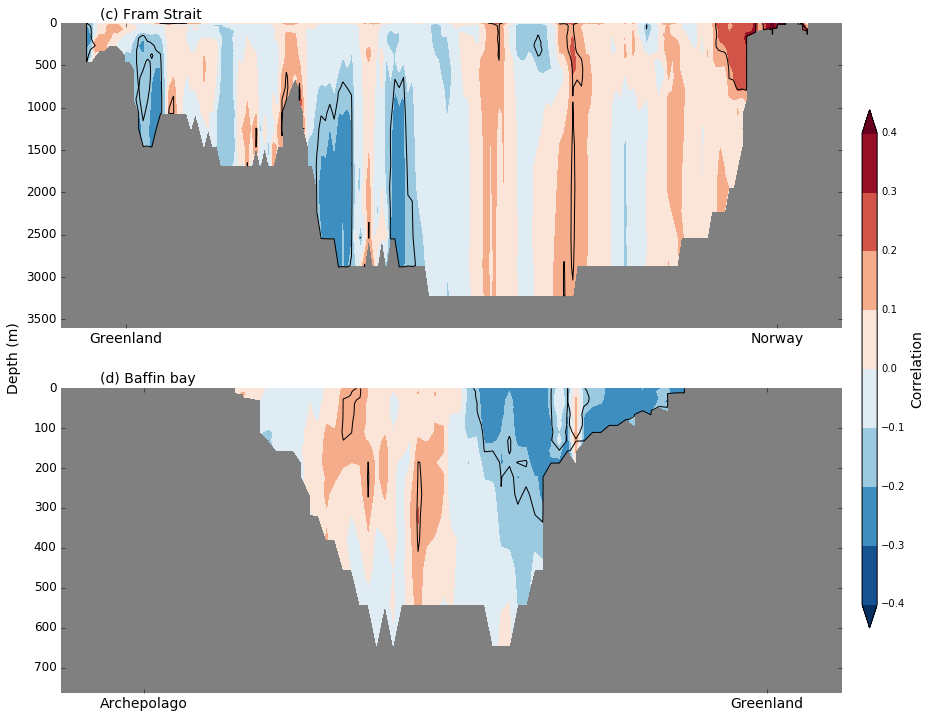

In [395]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Greenland', 'Norway'], fontsize=14); ax1.set_xticks([15, 165])
ax1.set_title('(c) Fram Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Archepolago', 'Greenland'], fontsize=14); ax2.set_xticks([40, 115])
ax2.set_title('(d) Baffin bay', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgridFS[:45, :], dgridFS[:45, :], corrFS[:45, :], lev_corr, cmap=plt.cm.RdBu_r, extend='both')
ax1.contour(fake_xgridFS[:45, :], dgridFS[:45, :], pFS[:45, :], [0.05], colors=('k',))
CS2 = ax2.contourf(fake_xgridBB[:34, 30:], dgridBB[:34, 30:], corrBB[:34, :], lev_corr, cmap=plt.cm.RdBu_r, extend='both')
ax2.contour(fake_xgridBB[:34, 30:], dgridBB[:34, 30:], pBB[:34, :], [0.05], colors=('k',))

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Correlation', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev_corr)